In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['order_products__train.csv', 'products.csv', 'departments.csv', 'order_products__prior.csv', 'orders.csv', 'sample_submission.csv', 'aisles.csv']


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
order_products_train_df = pd.read_csv("../input/order_products__train.csv")
order_products_prior_df = pd.read_csv("../input/order_products__prior.csv")
orders_df = pd.read_csv("../input/orders.csv")
products_df = pd.read_csv("../input/products.csv")
aisles_df = pd.read_csv("../input/aisles.csv")
departments_df = pd.read_csv("../input/departments.csv")

In [4]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
products_df .head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Text(0,0.5,'Frequency')

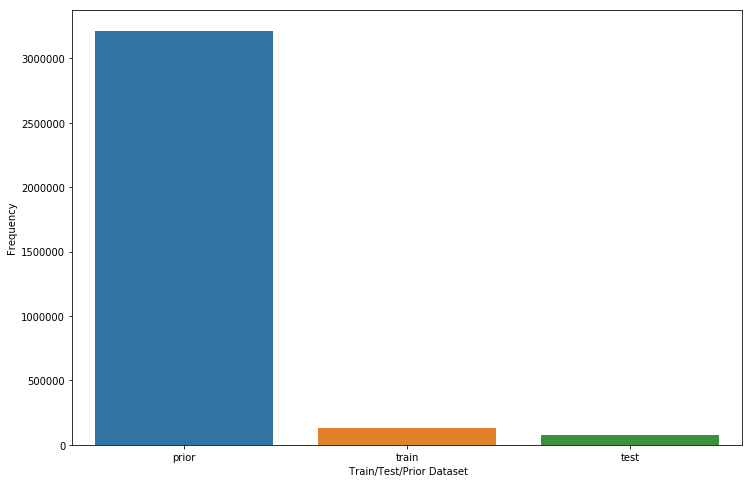

In [10]:
count=orders_df['eval_set'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values)
plt.xlabel(" Train/Test/Prior Dataset")
plt.ylabel("Frequency")

In [11]:
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [12]:
def unique_counts(x):
    return len(np.unique(x))


In [13]:
unique_counts_gp=orders_df.groupby('eval_set')['user_id'].agg(unique_counts)
unique_counts_gp

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

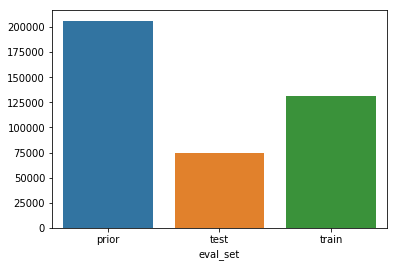

In [14]:
sns.barplot(unique_counts_gp.index,unique_counts_gp.values)

In [15]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
count_reordered=order_products_train_df.groupby('product_id')['reordered'].agg(unique_counts)
first_100_prod=count_reordered.head(100)
first_100_prod

product_id
1      2
2      2
3      1
4      2
5      1
7      1
8      2
9      2
10     2
11     2
12     2
13     1
14     1
15     1
16     1
18     2
21     1
22     1
23     2
25     2
26     2
27     1
28     2
29     2
30     2
31     1
32     2
33     1
34     2
35     2
      ..
82     1
83     2
84     2
86     2
87     2
89     2
91     1
92     1
93     2
94     2
95     2
96     1
97     1
98     1
99     2
100    2
101    2
102    2
104    2
105    1
106    2
107    1
108    2
109    2
110    2
112    1
113    2
114    1
115    2
116    2
Name: reordered, Length: 100, dtype: int64

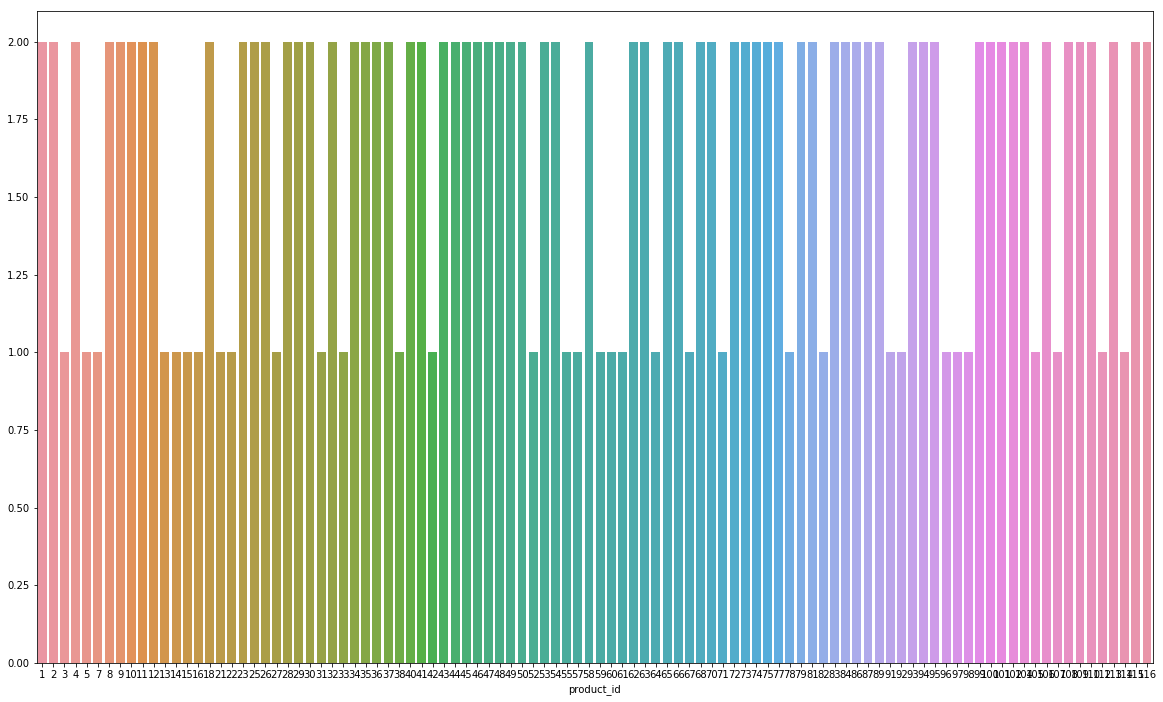

In [17]:
plt.figure(figsize=(20,12))
sns.barplot(first_100_prod.index,first_100_prod.values)

In [18]:
#Now let us validate the claim that 4 to 100 orders of a customer are given.

In [19]:
orders_df.head(12)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [20]:
number_of_orders=orders_df.groupby('user_id')['order_number'].count().reset_index().sort_values(by='order_number')
number_of_orders

,user_id,order_number
127632,127633,4
74146,74147,4
160569,160570,4
160559,160560,4
74170,74171,4
160557,160558,4
74174,74175,4
74176,74177,4
74178,74179,4
192368,192369,4


In [21]:
no_of_orders=orders_df.groupby('user_id')['order_number'].agg(np.max).value_counts()
no_of_orders

4      23986
5      19590
6      16165
7      13850
8      11700
9      10190
10      9032
11      7815
12      6952
13      6236
14      5613
15      5191
16      4593
17      4139
18      3836
19      3390
20      3200
21      2921
22      2706
23      2605
24      2288
25      2186
26      2060
27      1908
28      1779
29      1601
30      1494
31      1474
32      1386
100     1374
       ...  
70       178
72       166
74       162
75       162
71       154
73       138
76       134
78       127
79       127
77       120
82       119
80       116
81       108
85       100
84        99
86        93
83        86
90        85
88        79
87        78
89        77
92        69
93        67
96        67
95        64
94        57
91        56
97        54
98        50
99        47
Name: order_number, Length: 97, dtype: int64

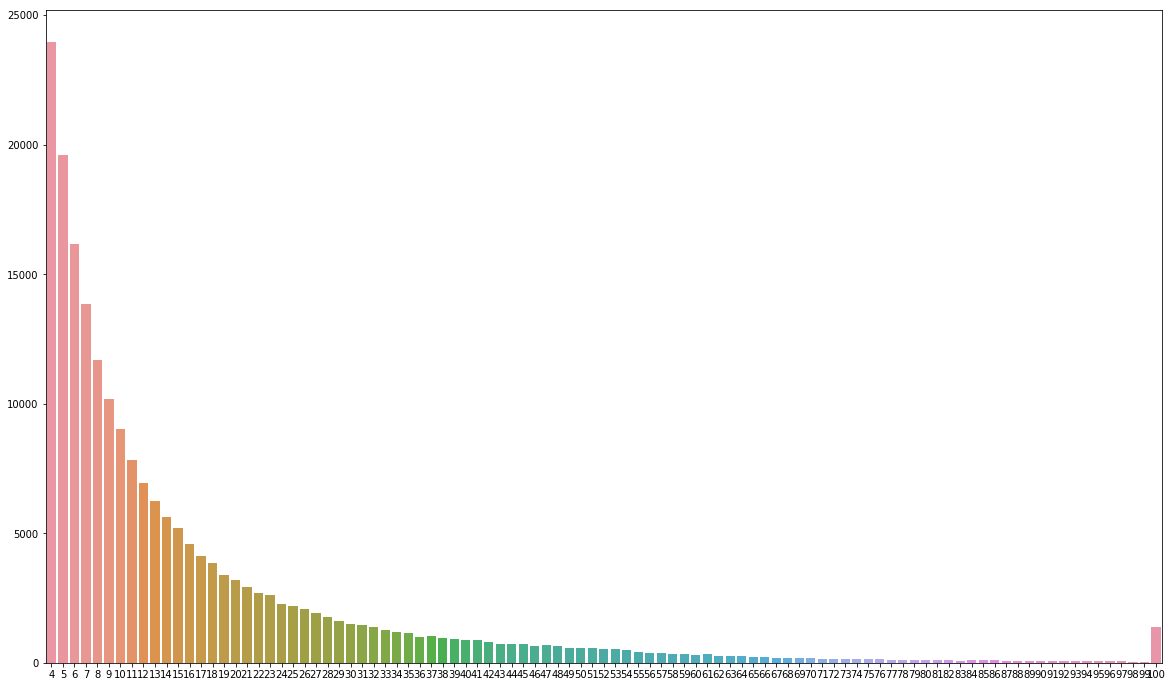

In [22]:
plt.figure(figsize=(20,12))
sns.barplot(no_of_orders.index,no_of_orders.values)

Now let us see how the ordering habit changes with day of week.

In [23]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [24]:
no_of_orders=orders_df.groupby("order_dow")['order_number'].count()
no_of_orders

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_number, dtype: int64

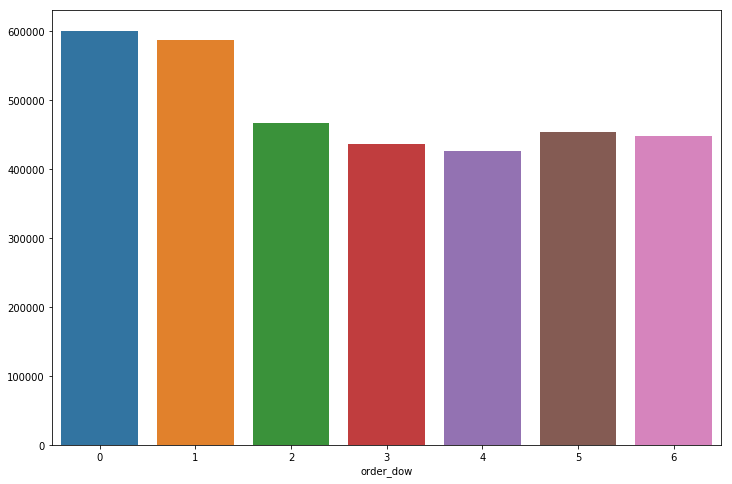

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(no_of_orders.index,no_of_orders.values)

In [26]:
# Number of orders by hours

In [27]:
no_of_orders_hour=orders_df.groupby("order_hour_of_day")['order_number'].count()
no_of_orders_hour

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_number, dtype: int64

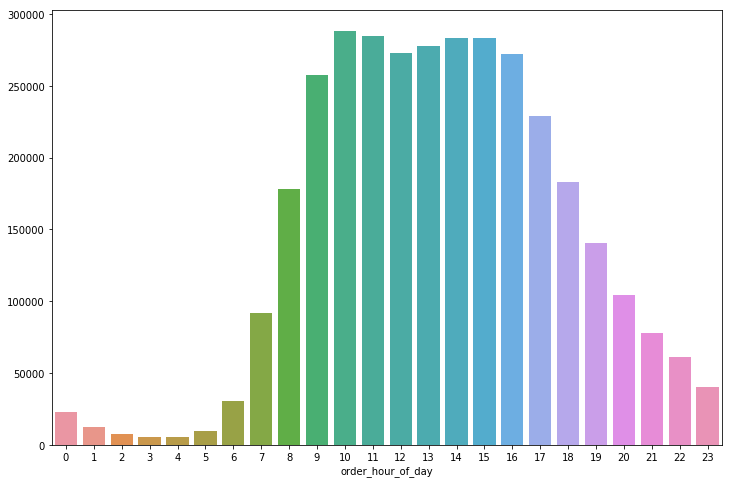

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(no_of_orders_hour.index,no_of_orders_hour.values)

In [29]:
#so majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

In [30]:
no_of_orders_dow_hour=orders_df.groupby(["order_dow",'order_hour_of_day'])['order_number'].count().reset_index()
no_of_orders_dow_hour.pivot('order_dow', 'order_hour_of_day', 'order_number')


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


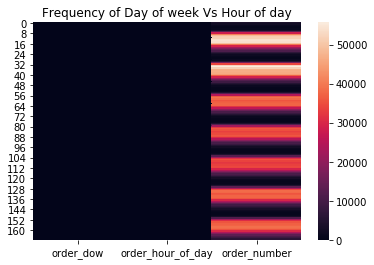

In [31]:
sns.heatmap(no_of_orders_dow_hour)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [32]:
orders_df.groupby("order_hour_of_day")['order_number'].agg('sum').reset_index()

,order_hour_of_day,order_number
0,0,363764
1,1,191485
2,2,120496
3,3,89637
4,4,93236
5,5,175324
6,6,588351
7,7,1789076
8,8,3382929
9,9,4772376


In [33]:
orders_df.groupby("order_hour_of_day")['order_number'].agg('count').reset_index()

,order_hour_of_day,order_number
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527
5,5,9569
6,6,30529
7,7,91868
8,8,178201
9,9,257812


In [34]:
#Frequency distribution by days since prior order
#Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

#Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

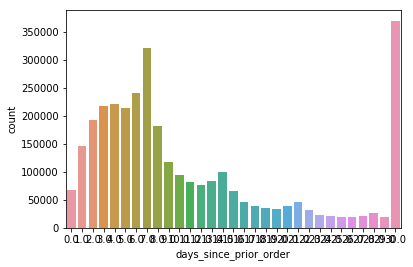

In [35]:
sns.countplot(x='days_since_prior_order',data=orders_df)

In [36]:
#Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

In [37]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [38]:
# Reordered % in train set
# 59% customers in training set reordered
len(order_products_train_df[order_products_train_df['reordered']==1])/len(order_products_train_df)

0.5985944127509629

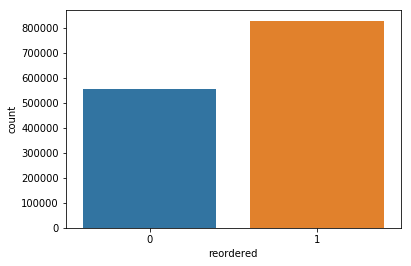

In [39]:
sns.countplot(x=order_products_train_df['reordered'],data=order_products_train_df)

In [40]:
 #Reordered % in prior set
# 59% customers in training set reordered
len(order_products_prior_df[order_products_prior_df['reordered']==1])/len(order_products_prior_df)

0.5896974667922161

In [41]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0
5,7,0
6,8,1
7,9,10
8,10,8
9,11,5


In [42]:
#About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.


len(grouped_df[grouped_df['reordered']==0])/len(grouped_df)

0.12084859313304347

In [43]:
#Now let us see the number of products bought in each order.
order_products_train_df.head(30)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [44]:
cnt_srs=order_products_train_df.groupby('order_id')['add_to_cart_order'].agg(np.max).value_counts()
cnt_srs
#value_counts()

5     8895
6     8708
7     8541
4     8218
3     8033
8     7983
2     7368
9     7217
1     6845
10    6553
11    6034
12    5383
13    4843
14    4394
15    3831
16    3522
17    3108
18    2719
19    2473
20    2102
21    1857
22    1681
23    1462
24    1292
25    1079
26     986
27     860
28     679
29     634
30     553
      ... 
47      49
46      48
48      32
50      31
49      26
51      24
52      23
53      18
54      15
55      12
56      10
60       8
57       6
58       5
63       5
70       4
59       4
64       4
61       3
62       3
65       3
76       2
74       2
72       2
80       2
68       2
66       2
67       1
75       1
77       1
Name: add_to_cart_order, Length: 75, dtype: int64

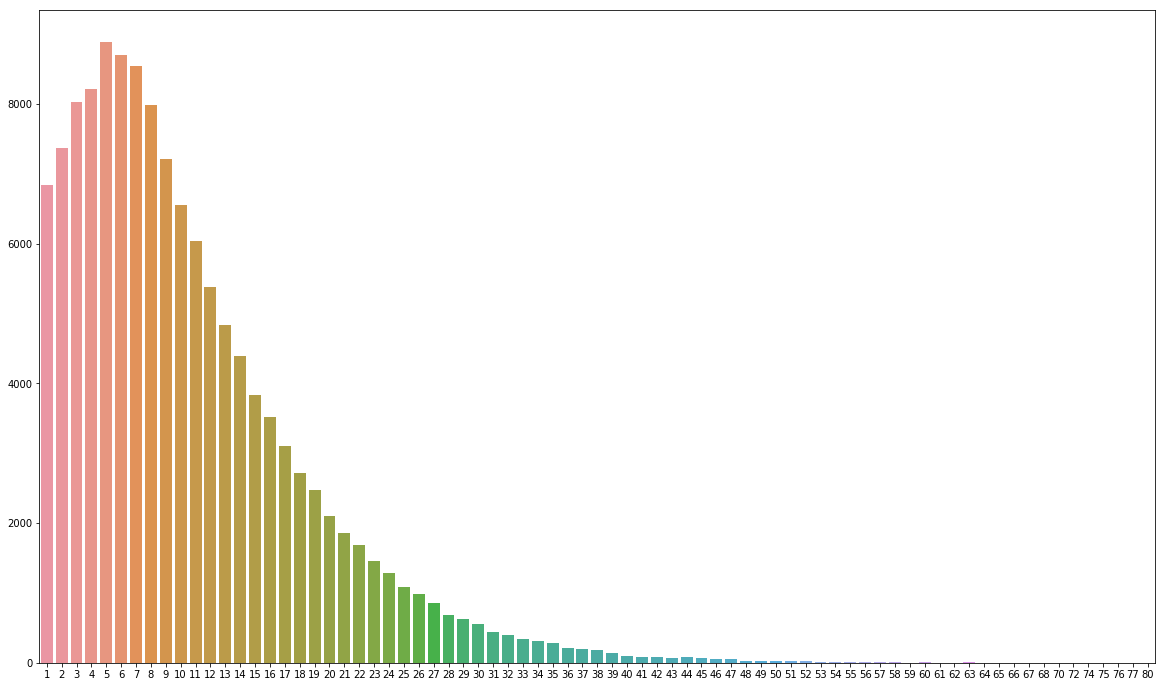

In [45]:
plt.figure(figsize=(20,12))
sns.barplot(cnt_srs.index,cnt_srs.values)

In [46]:
#Before we explore the product details, let us look at the other three files as well.
order_products_prior_df.head(2)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [47]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [48]:
order_products_prior_df_1=pd.merge(order_products_prior_df,products_df, on ='product_id',how='left')
order_products_prior_df_1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
5,2,17794,6,1,Carrots,83,4
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,Classic Blend Cole Slaw,123,4
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16


In [49]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [50]:
order_products_prior_df_1=pd.merge(order_products_prior_df_1,aisles_df, on ='aisle_id',how='left')

In [51]:
order_products_prior_df_1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [52]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [53]:
order_products_prior_df_1=pd.merge(order_products_prior_df_1,departments_df, on ='department_id',how='left')

In [54]:
order_products_prior_df_1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [55]:
# Lets count top 10 products ordered

In [56]:
cnt_srs=order_products_prior_df_1['product_name'].value_counts().head(10)
cnt_srs

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

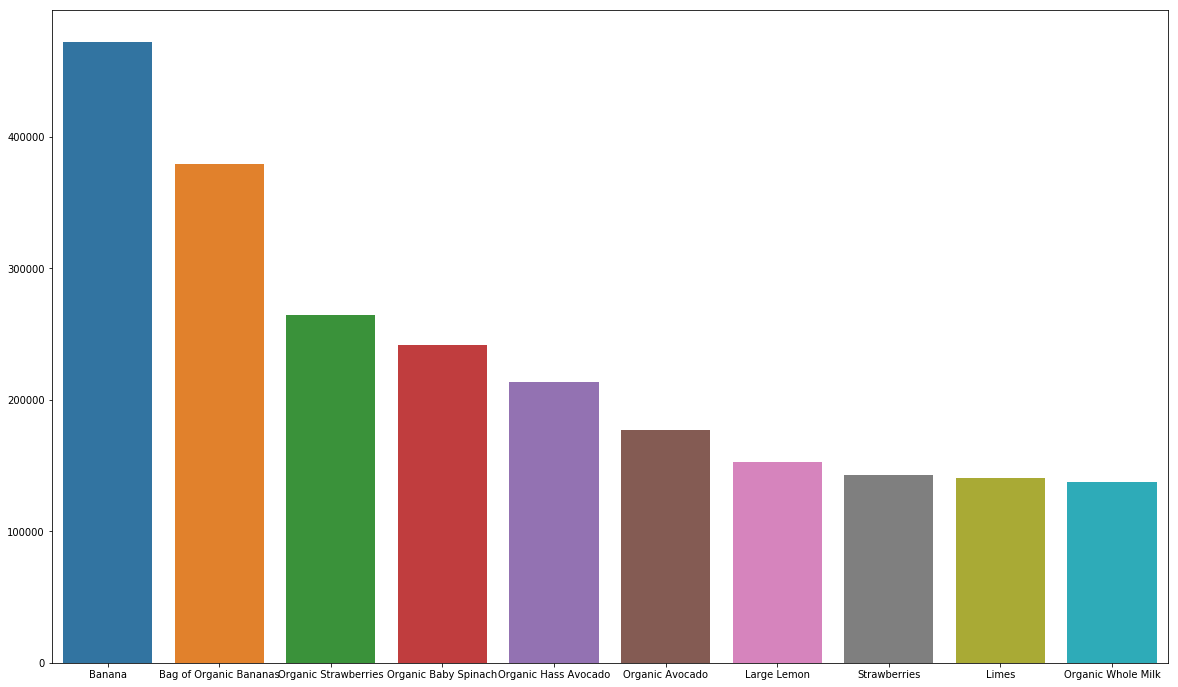

In [57]:
plt.figure(figsize=(20,12))
sns.barplot(cnt_srs.index,cnt_srs.values)

In [58]:
# wow, most of them are fruits and most of them are organic products

In [59]:
#Now let us look at the important aisles.

In [60]:
cnt_srs1=order_products_prior_df_1['aisle'].value_counts().head(20)
cnt_srs1

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

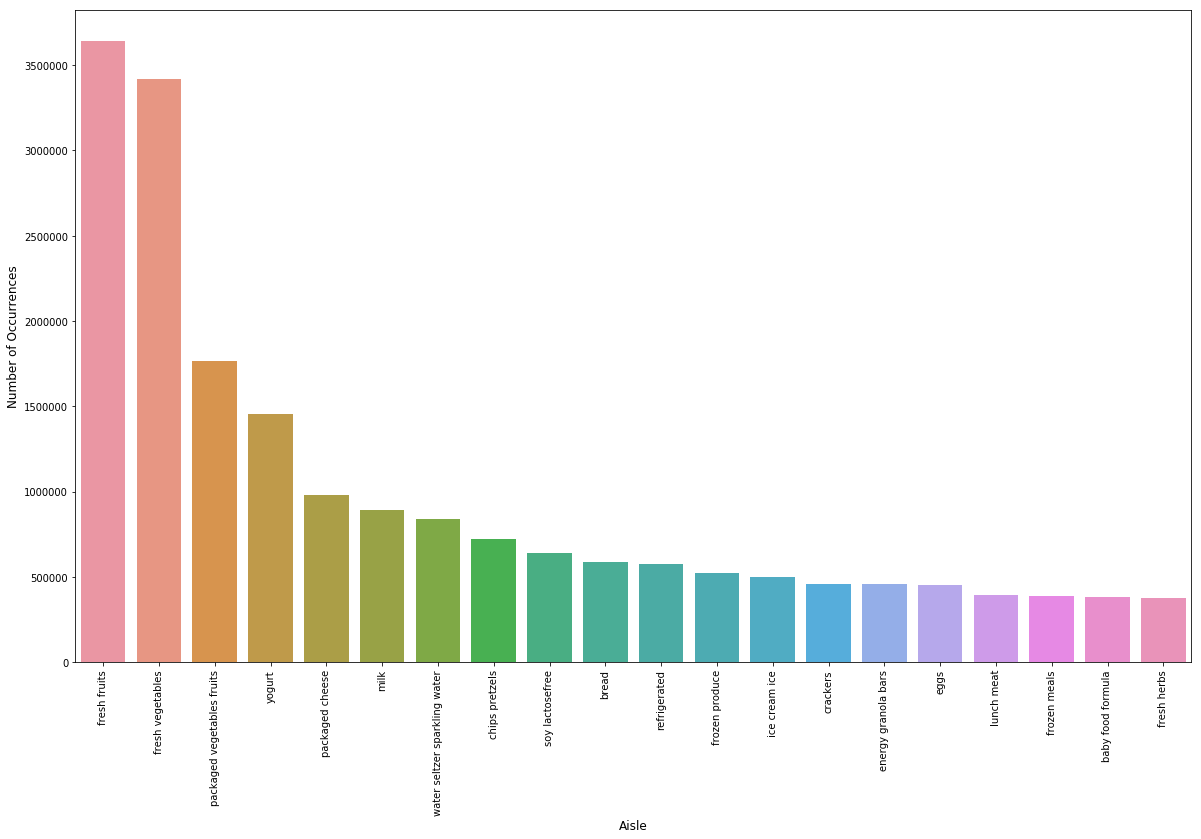

In [61]:
plt.figure(figsize=(20,12))
sns.barplot(cnt_srs1.index, cnt_srs1.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top two aisles are fresh fruits and fresh vegetables.!

Department Distribution:

Let us now check the department wise distribution.

In [62]:
order_products_prior_df_1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [63]:
depatment_order= order_products_prior_df_1.groupby('department_id')['product_id'].agg('count').reset_index()
depatment_order

,department_id,product_id
0,1,2236432
1,2,36291
2,3,1176787
3,4,9479291
4,5,153696
5,6,269253
6,7,2690129
7,8,97724
8,9,866627
9,10,34573


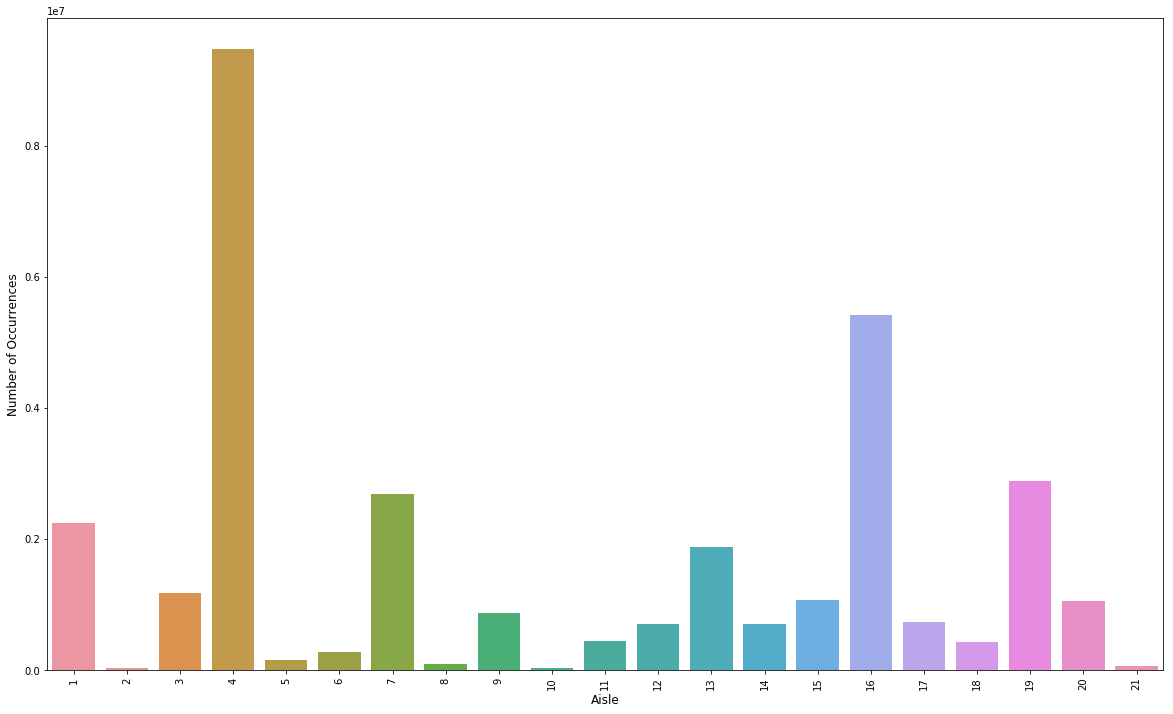

In [64]:
plt.figure(figsize=(20,12))
sns.barplot(depatment_order.department_id, depatment_order.product_id)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
count_department= order_products_prior_df_1['department_id'].value_counts().reset_index()
count_department

,index,department_id
0,4,9479291
1,16,5414016
2,19,2887550
3,7,2690129
4,1,2236432
5,13,1875577
6,3,1176787
7,15,1068058
8,20,1051249
9,9,866627


In [66]:
labels= np.array(count_department.index)
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [67]:
values= np.array(count_department.department_id/count_department.department_id.sum()*100)

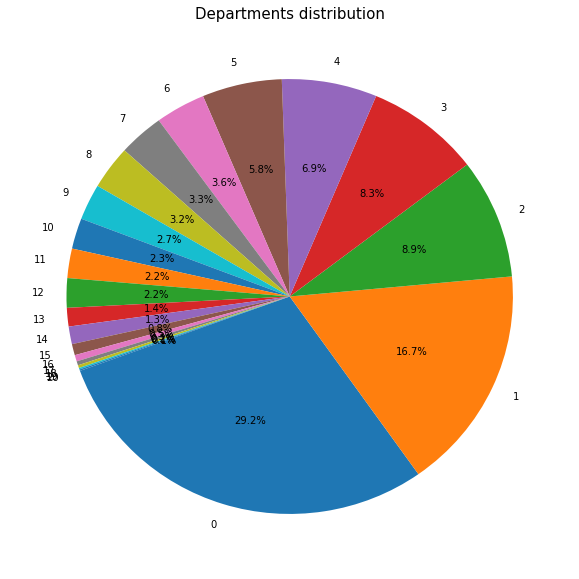

In [68]:
plt.figure(figsize=(10,10))
plt.pie(values, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()



 Now let us check the reordered percentage of each department.

Department wise reorder:

In [69]:
order_products_prior_df_1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [70]:
cnt_srs=order_products_prior_df_1.groupby("department_id")['reordered'].agg('count').reset_index()
cnt_srs

,department_id,reordered
0,1,2236432
1,2,36291
2,3,1176787
3,4,9479291
4,5,153696
5,6,269253
6,7,2690129
7,8,97724
8,9,866627
9,10,34573


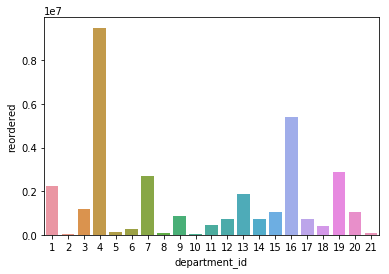

In [71]:
sns.barplot(cnt_srs.department_id,cnt_srs.reordered)

Department wise reorder ratio

In [72]:
cnt_srs_ratio=order_products_prior_df_1.groupby("department_id")['reordered'].agg('mean').reset_index()
cnt_srs_ratio

,department_id,reordered
0,1,0.541885
1,2,0.407980
2,3,0.628141
3,4,0.649913
4,5,0.569924
5,6,0.369229
6,7,0.653460
7,8,0.601285
8,9,0.461076
9,10,0.577040


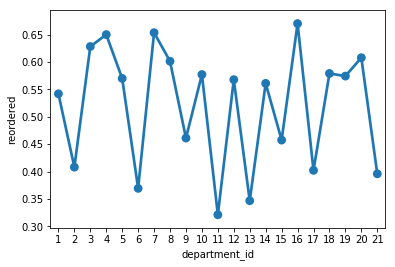

In [73]:
sns.pointplot(cnt_srs_ratio.department_id,cnt_srs_ratio.reordered)

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

Aisle - Reorder ratio:

In [74]:
cnt_srs_ratio_aisle=order_products_prior_df_1.groupby("aisle")['reordered'].agg('mean').reset_index()
cnt_srs_ratio_aisle

,aisle,reordered
0,air fresheners candles,0.309052
1,asian foods,0.351132
2,baby accessories,0.550980
3,baby bath body care,0.295770
4,baby food formula,0.590259
5,bakery desserts,0.499125
6,baking ingredients,0.305082
7,baking supplies decor,0.167229
8,beauty,0.212062
9,beers coolers,0.565304


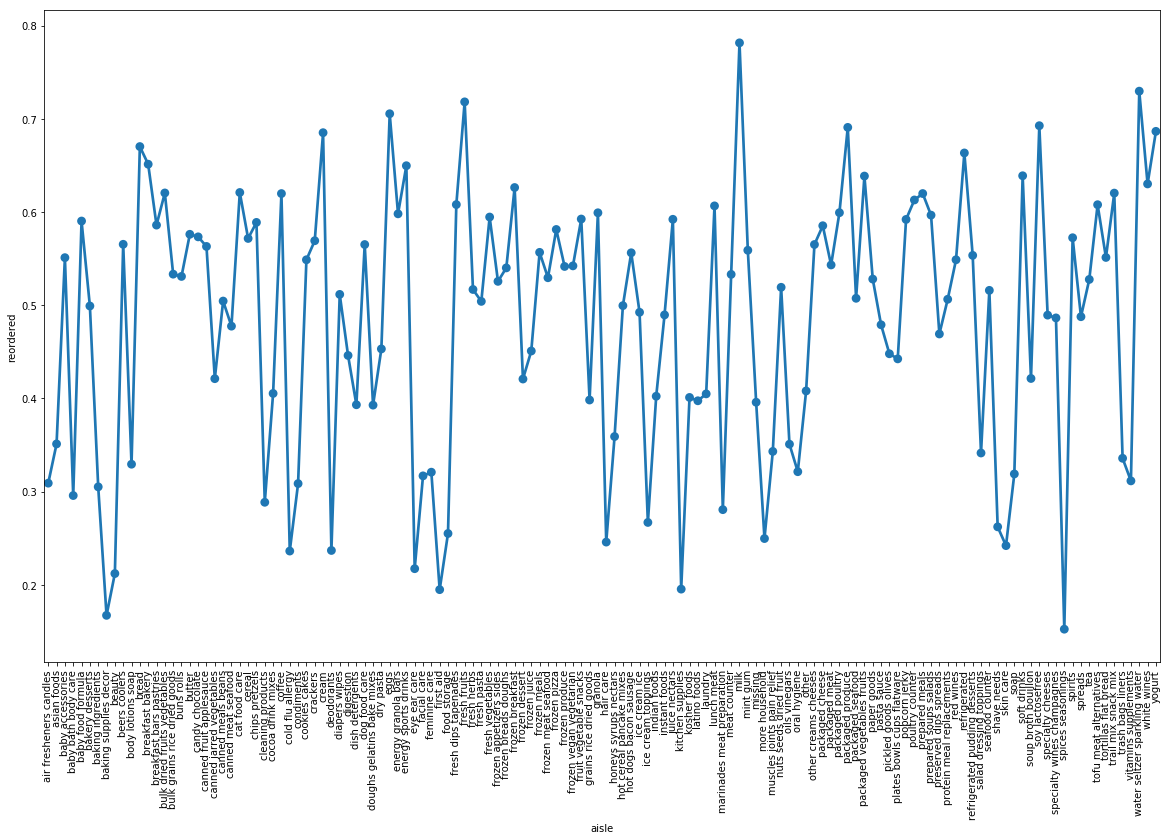

In [75]:
plt.figure(figsize=(20,12))
sns.pointplot(cnt_srs_ratio_aisle.aisle,cnt_srs_ratio_aisle.reordered)
plt.xticks(rotation='vertical')
plt.show()

#Add to Cart - Reorder ratio:

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

In [76]:
order_products_prior_df_1.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [77]:
cnt_srs_ratio_add_to_cart=order_products_prior_df_1.groupby("add_to_cart_order")['reordered'].agg('mean').reset_index()
cnt_srs_ratio_add_to_cart

,add_to_cart_order,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


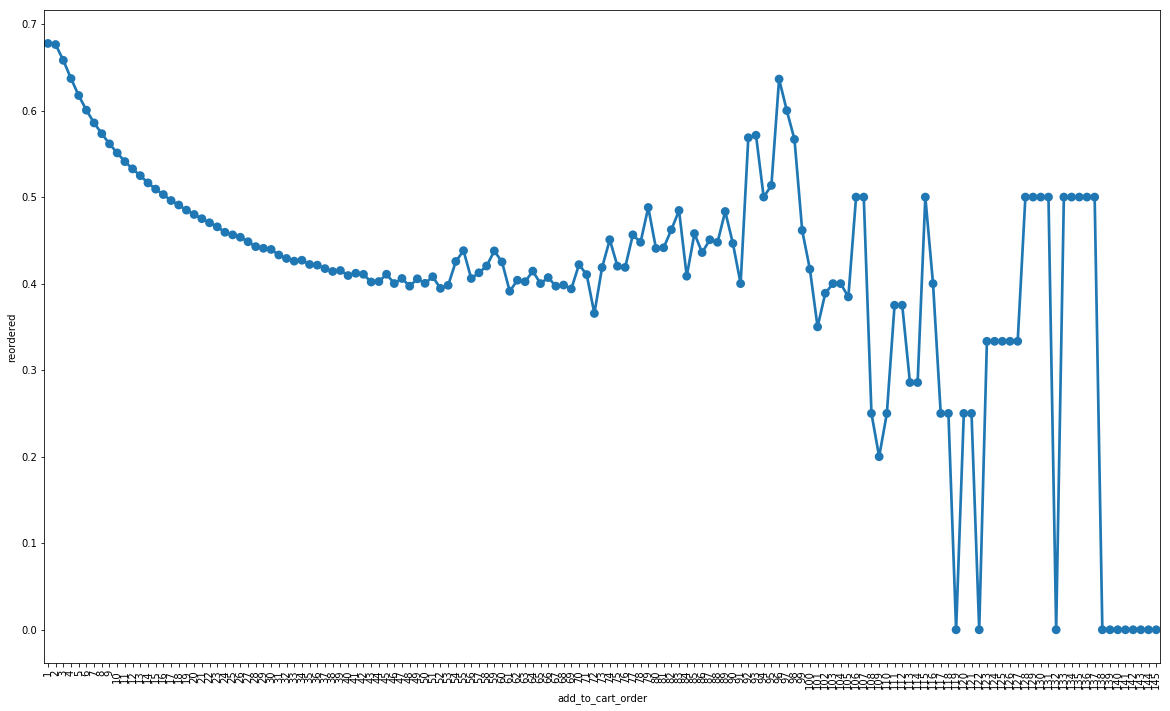

In [78]:
plt.figure(figsize=(20,12))


sns.pointplot(cnt_srs_ratio_add_to_cart.add_to_cart_order,cnt_srs_ratio_add_to_cart.reordered)
plt.xticks(rotation='vertical')
plt.show()

Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

Reorder ratio by Time based variables:

In [79]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [80]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


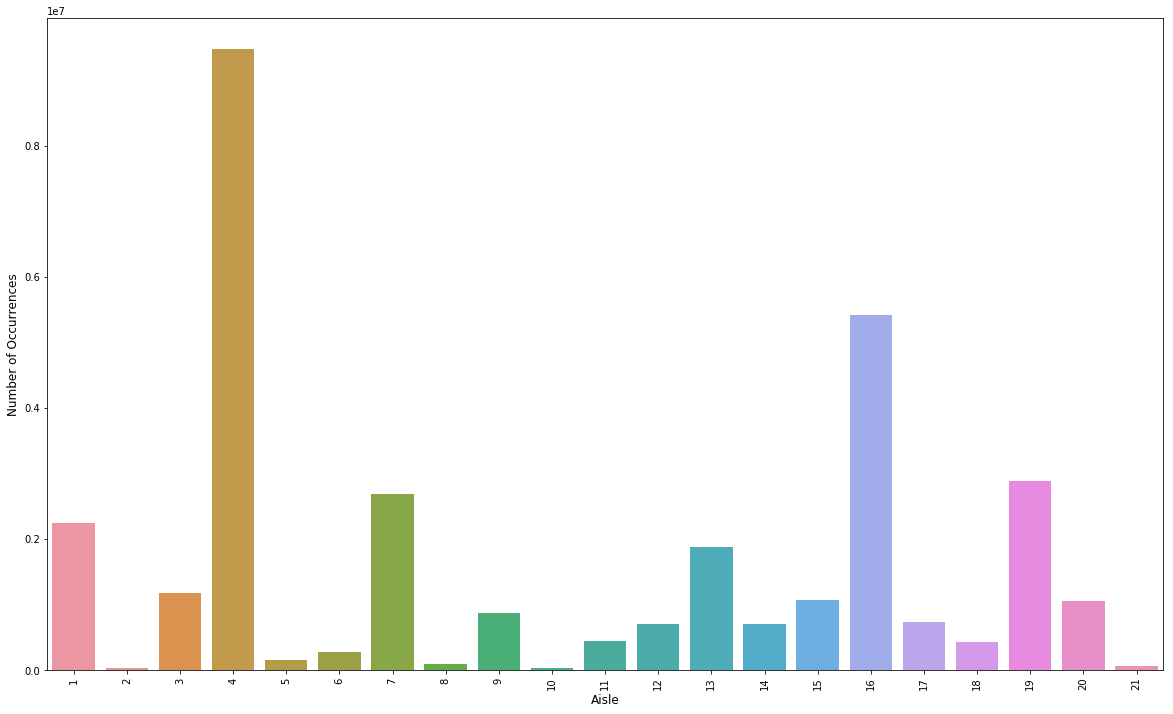

In [81]:
plt.figure(figsize=(20,12))
sns.barplot(depatment_order.department_id, depatment_order.product_id)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()